<a href="https://colab.research.google.com/github/ibedoor/machine-learning/blob/main/SDA_ML_Week2_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
cs = cm.Set2(np.arange(2)/2.)
from sklearn.metrics import*
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


<center><H1>Adult Dataset Classification</H1></center>


<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/HoffxyN8ghVuw/giphy.gif">
</p>

### Target = "<=50k"

### [Data Dictionary/Details](https://archive.ics.uci.edu/ml/datasets/Adult)

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- "<=50k" = >50K, <=50K (TARGET)

<center><H3>-----RULES-----</H3></center>

<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/iB4PoTVka0Xnul7UaC/giphy.gif">
</p>

### Your data has already been split into training and testing sets, do not use `train_test_split`
### Only use your training set for EDA, Cleaning, Modeling, etc.
- **You will have to perform the same transformations on your test set that you apply to your training set. The column names are exactly the same as your training set.**

### **DO NOT** look into your test set until you are ready to test the accuracy of your model. Your test set is supposed to represent unseen data and lets treat it that way until we are ready to test our accuracy. Your transformations on your training set should work on your test set since it has the exact same column names and the values are exactly the same.



In [2]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)


training["target"] = training["target"].apply(lambda x: x.strip())
test["target"] = test["target"].apply(lambda x: x.strip()[:-1])


# Create Train
X_train = training.drop("target", axis=1)
y_train = training["target"]

# Create Test
X_test = test.drop("target", axis=1)
y_test = test["target"]

In [3]:
training

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


### **Determine your baseline model accuracy**

In [4]:
training['target'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

### **Visualize the data in your training set (EDA)**
- Please only create 3 visualization explaining different insights in the data. So you have enough time to model. 
- You can only use one of each plot type, this means you cant make 3 bar plot, 3 Scatter Plots, etc.


In [5]:
training.sex.unique()

array([' Male', ' Female'], dtype=object)

In [6]:
 training['sex'] = training['sex'].map({' Male':0, ' Female':1}).astype(int)

In [7]:
# correlation
corr = training.corr()
corr.style.background_gradient(cmap='Set3')

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,-0.088832,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,-0.026858,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,-0.012280,0.122630,0.079923,0.148123
sex,-0.088832,-0.026858,-0.012280,1.000000,-0.048480,-0.045567,-0.229309
capital_gain,0.077674,0.000432,0.122630,-0.048480,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.045567,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,-0.229309,0.078409,0.054256,1.000000


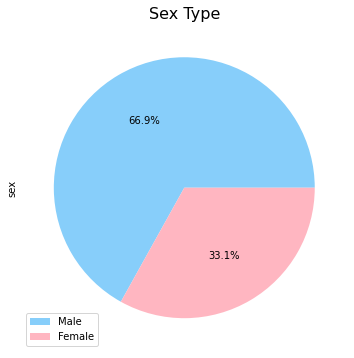

In [8]:
r = training.sex.value_counts()
plt.figure(figsize=(10,6))
labels = ['Male', 'Female']
r.plot.pie(autopct='%.1f%%', labels=None, colors = ['lightskyblue', 'lightpink']).set_title('Sex Type', fontsize=16)
plt.legend(labels);

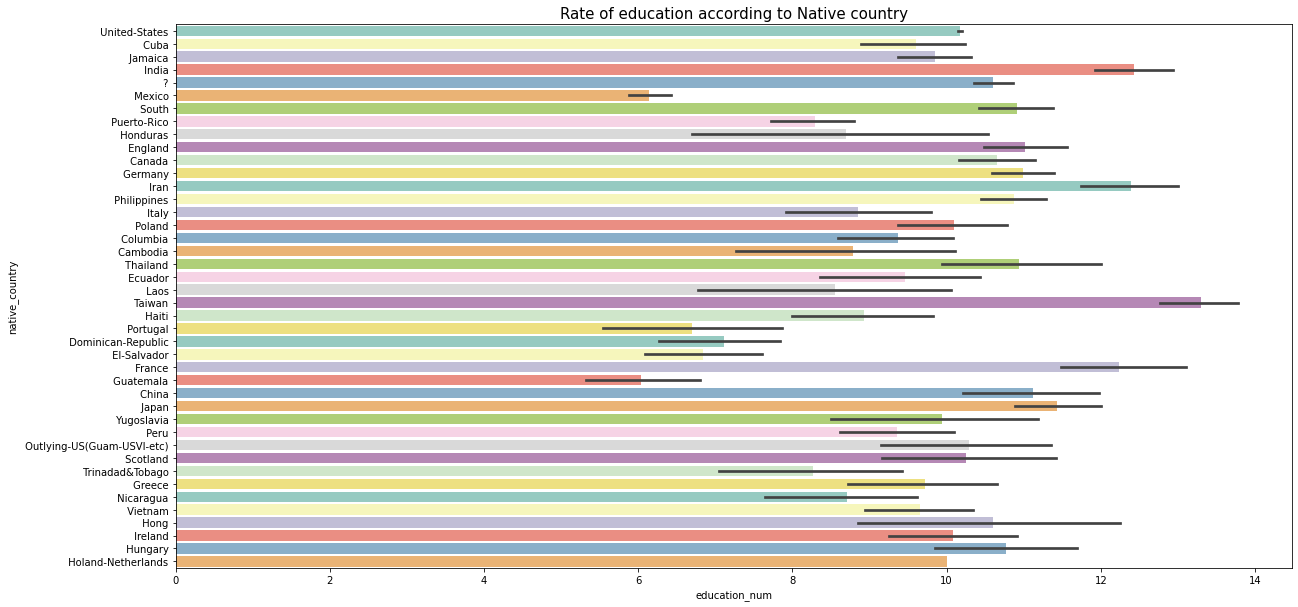

In [9]:
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(y='native_country', x='education_num' ,data=training, palette='Set3').set_title('Rate of education according to Native country', fontsize=15);

In [10]:
total_fnlwgt_hours_per_week=training.groupby('hours_per_week').sum().fnlwgt
total_fnlwgt_hours_per_week.values

array([   3327224,    6952155,    7529268,    8509831,   10249166,
         11323592,    4500355,   27633176,    3135313,   48897475,
          1550761,   31012276,    4570396,    6194330,   77315870,
         36695379,    5942515,   12790733,    2745460,  235546373,
          4865086,    7530625,    4172172,   48651920,  130769198,
          6173627,    5436288,   15864459,    1746750,  219884290,
           899783,   51662811,    8223397,    4646109,  246323522,
         45192918,   26973050,   85684989,    6475594, 2942919842,
          6559491,   40340827,   25973393,   40698156,  341886715,
         15122428,    7972588,  103284466,    5558326,  529072468,
          1941600,   28064520,    4432519,    7858421,  120819410,
         17459560,    2288198,    4722553,    1076474,  266003865,
           255507,    2722481,    2797644,    2687744,   44565840,
          3071903,     713150,    1365616,   51320658,   12216994,
           353975,     139889,   12341480,     520047,    1413

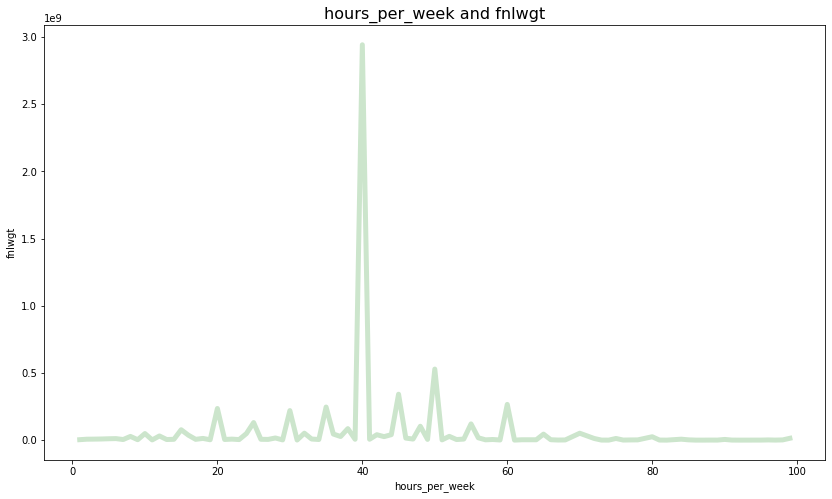

In [11]:
plt.figure(figsize=(14,8))
plt.plot(total_fnlwgt_hours_per_week, color='green', alpha=0.2, linewidth=5)
plt.xlabel('hours_per_week')
plt.ylabel('fnlwgt')
plt.title('hours_per_week and fnlwgt',  fontsize=16)
plt.show();

### **Clean and Preprocess your Data** (Hint: One-Hot-Encode Categoricals)
Another hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [12]:
training.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [13]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [14]:
training.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [15]:
training.drop(training.loc[training['native_country']==' ?'].index, inplace=True)

In [16]:
training.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
ooccupation       object
relationship      object
sex                int64
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
target            object
dtype: object

In [17]:
training['target']= training['target'].map({'<=50K':1, '>50K':0}).astype(int)
training.target

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: target, Length: 31978, dtype: int64

In [18]:
cat_col = [col for col in training.columns if training[col].dtype=='O']
cat_col

['workclass',
 'education',
 'marital_status',
 'ooccupation',
 'relationship',
 'native_country']

In [19]:
int_col = [col for col in training.columns if training[col].dtype!='O']
int_col

['age',
 'fnlwgt',
 'education_num',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'target']

In [20]:
categorical = training[cat_col]
categorical.head()

,workclass,education,marital_status,ooccupation,relationship,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Cuba


In [21]:
categorical_dum = pd.get_dummies(categorical)
categorical_dum.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_new = pd.concat(
    [training,
     categorical_dum],
      axis=1)
df_new

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,2174,0,40,United-States,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,13,United-States,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,40,United-States,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,0,40,United-States,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,0,0,40,Cuba,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,1,0,0,38,United-States,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,1,0,0,40,United-States,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,0,20,United-States,1,0,0,0,

In [23]:
df_new.drop(['workclass',
 'education',
 'marital_status',
 'ooccupation',
 'relationship',
 'native_country'], axis=1, inplace=True)

df_new

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,0,2174,0,40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,0,0,38,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,0,20,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### **Create a kNN model** 



In [24]:
# correlation
corr = df_new.corr()
corr.style.background_gradient(cmap='Set3')

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.model_selection import train_test_split
X = df_new.drop(['target'], axis=1)
#X = df_new[['relationship_ Husband', 'marital_status_ Married-civ-spouse', 'marital_status_ Never-married','education_num', 'age', 'hours_per_week']]
y = df_new.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=5)

In [27]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
preds = knn.predict(X_test)

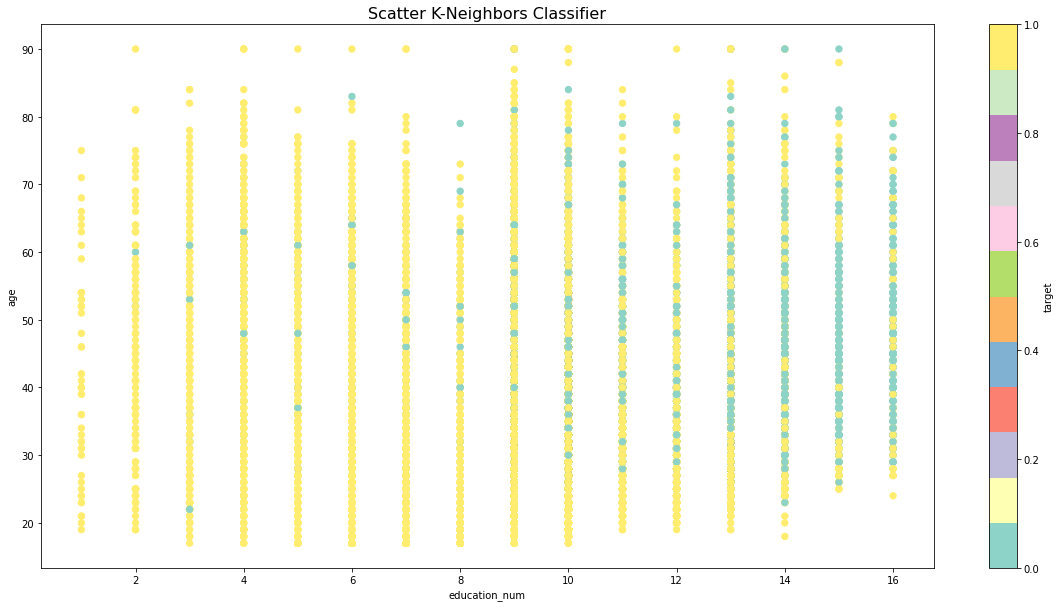

In [30]:
df_new.plot(kind='scatter', x='education_num', y='age',
        c='target', cmap=('Set3'), sharex=False, s = 40)
plt.title('Scatter K-Neighbors Classifier', fontsize=16);

Scatter Testing Dataset

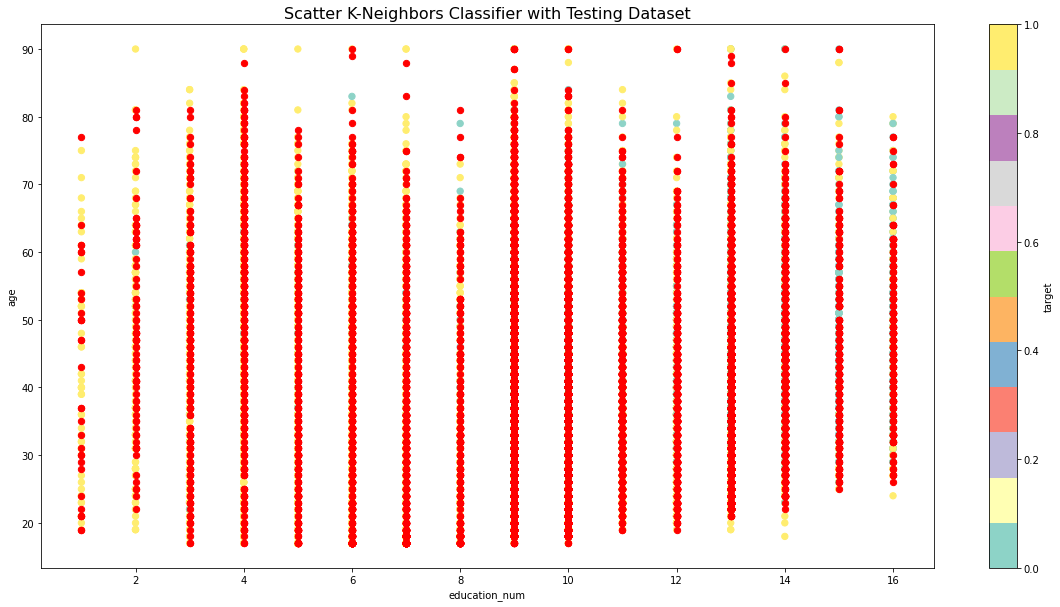

In [31]:
df_new.plot(kind='scatter', x='education_num', y='age',
        c='target', cmap=('Set3'), sharex=False, s = 40)
# scatter testing dataset (black)
plt.scatter(x=test['education_num'], y=test['age'],
            color='r', s=40)
plt.title('Scatter K-Neighbors Classifier with Testing Dataset', fontsize=16);

### **Show us your confusion matrix and explain the results**

In [32]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.54      0.31      0.39      2251
           1       0.81      0.92      0.86      7343

    accuracy                           0.78      9594
   macro avg       0.68      0.61      0.63      9594
weighted avg       0.75      0.78      0.75      9594



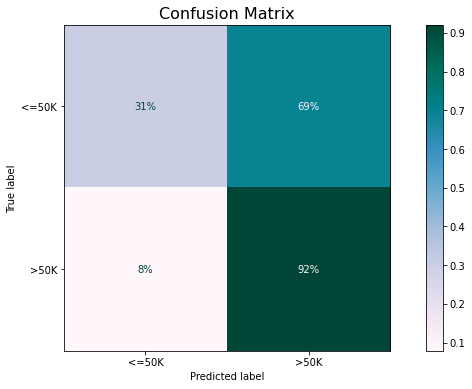

In [33]:
# confusion matrix by sklearn
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(13, 6))
plt.title('Confusion Matrix', fontsize=16)
plot_confusion_matrix(knn, X=X_test, y_true=y_test, cmap='PuBuGn', ax=ax, display_labels=['<=50K', '>50K'], normalize='true', values_format='.0%');

**TP** = predicted <=50K , is <=50K\
**FP** = predicted <=50K, is >50\
**TN** = predicted >50, is >50\
**FN** = predicted >50, is <=50K

### **Compare to Baseline model and explain the results**

In [34]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? 
# make predictions baseline
baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds 

0       1
1       1
2       1
3       1
4       1
       ..
9589    1
9590    1
9591    1
9592    1
9593    1
Length: 9594, dtype: int64

In [35]:
# baseline accuracy
baseline_acc = accuracy_score(y_test, baseline_preds)
print("Baseline Accuracy is {:.2f}%".format(baseline_acc*100))

Baseline Accuracy is 76.54%


In [36]:
# KNN accuracy
print("KNN Accuracy is {:.2f}%".format(accuracy_score(y_test, preds)*100))

KNN Accuracy is 77.68%


KNN Model shows 77.68%, which is records slightly moderate accuracy increase, and baseline accuracy is shown 76.54%. It is not a considered a big difference, the percentages are close.

### **BONUS ☝️**
- Create a Logistic Regression Model
- Compare results to kNN and Baseline and explain the results



In [37]:
#training['target'].value_counts(normalize=True)

In [38]:
lr = LogisticRegression(fit_intercept=True)

In [39]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
preds_lr= lr.predict(X_test)

In [41]:
acc = accuracy_score(y_test, lr.predict(X_test))
print("Logistic Regression Accuracy is {:.2f}%".format(acc*100))

Logistic Regression Accuracy is 80.07%


### **BONUS ✌️**
- Use GridSearchCV with your Logistic Regression with `cv=10` passed into your grid

In [42]:
p_grid = {'algorithm':['auto', 'ball_tree', 'kd_tree'],
          'leaf_size':[30], 'metric':['minkowski'],
          'n_jobs':[-1,1], 'n_neighbors':[5], 'p':[2],
          'weights':['uniform']}

grid = GridSearchCV(knn, p_grid,cv=10 )
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30], 'metric': ['minkowski'],
                         'n_jobs': [-1, 1], 'n_neighbors': [5], 'p': [2],
                         'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
knn_grid = KNeighborsClassifier(algorithm ='auto',
 leaf_size=30,
 metric= 'minkowski',
 n_jobs= -1,
 n_neighbors= 5,
 p= 2,
 weights='uniform')

In [ ]:
knn_grid.fit(X_train, y_train)

In [ ]:
preds = knn_grid.predict(X_test)
preds

In [ ]:
acc = accuracy_score(y_test, knn_grid.predict(X_test))
print("KNN Grid Accuracy is {:.2f}%".format(acc*100))

In [ ]:
# import libraries roc_curve and area under curve
from sklearn.metrics import roc_curve, auc

# calculate roc curve
false_positive_rate_knn, true_positive_rate_knn, thresholds_knn = roc_curve(y_test, preds)
false_positive_rate_lr, true_positive_rate_lr, thresholds_lr = roc_curve(y_test, preds_lr)

# calculate area under curve 
roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)
roc_auc_lr = auc(false_positive_rate_lr, true_positive_rate_lr)

# figure size
plt.figure(figsize=(10,6))
# plot roc curve
plt.plot(false_positive_rate_knn, true_positive_rate_knn, color='green', label='ROC curve (area of KNN= %0.2f)' % roc_auc_knn)
plt.plot(false_positive_rate_lr, true_positive_rate_lr, color='grey', label='ROC curve (area of LR = %0.2f)' % roc_auc_lr)

# add labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add title and specific location of legend
plt.title('ROC Curve', fontsize=16)
# show the plot
plt.legend(loc="lower right")
plt.show()

As we seen above the Area Under Curve (AUC) for K-Nearset Neighbors algorithm `KNN` and Logistics Regression model `LR` is the same both equal `0.61`. Based on the results, we can decide that it is not a good result. In this case, the best we try in another model that covers the largest possible AUC.